# Luhn Algorithm

This algorithm was created by an IBM scientist named Hans Peter Luhn. The algorithm is used to validate identification numbers, much like hashing. It's used for anything from credit cards to SIN numbers in order to quickly check whether the number is valid.

Here's how it works:
1. If the number of digits is even, start at the first digit; if the number of digits is odd, start at the second digit. Multiply every second digit by 2.
2. Add the sum of the digits of all the digits multiplied by 2 (ie. if the result is 18, then the sum would be 1 + 8 = 9)
3. Add the sum of step 2 with all of the non-doubled digits and find the remainder after dividing by 10. The remainder can be used to determine the validity of the ID number.

### Here's an example:

Most credit cards have 16 digits, with the last digit being a check-digit. Let's walk through an example with a fictitious (hopefully) credit card number I found on [The Balance](https://www.thebalance.com/what-do-the-numbers-on-your-credit-card-mean-4588401):

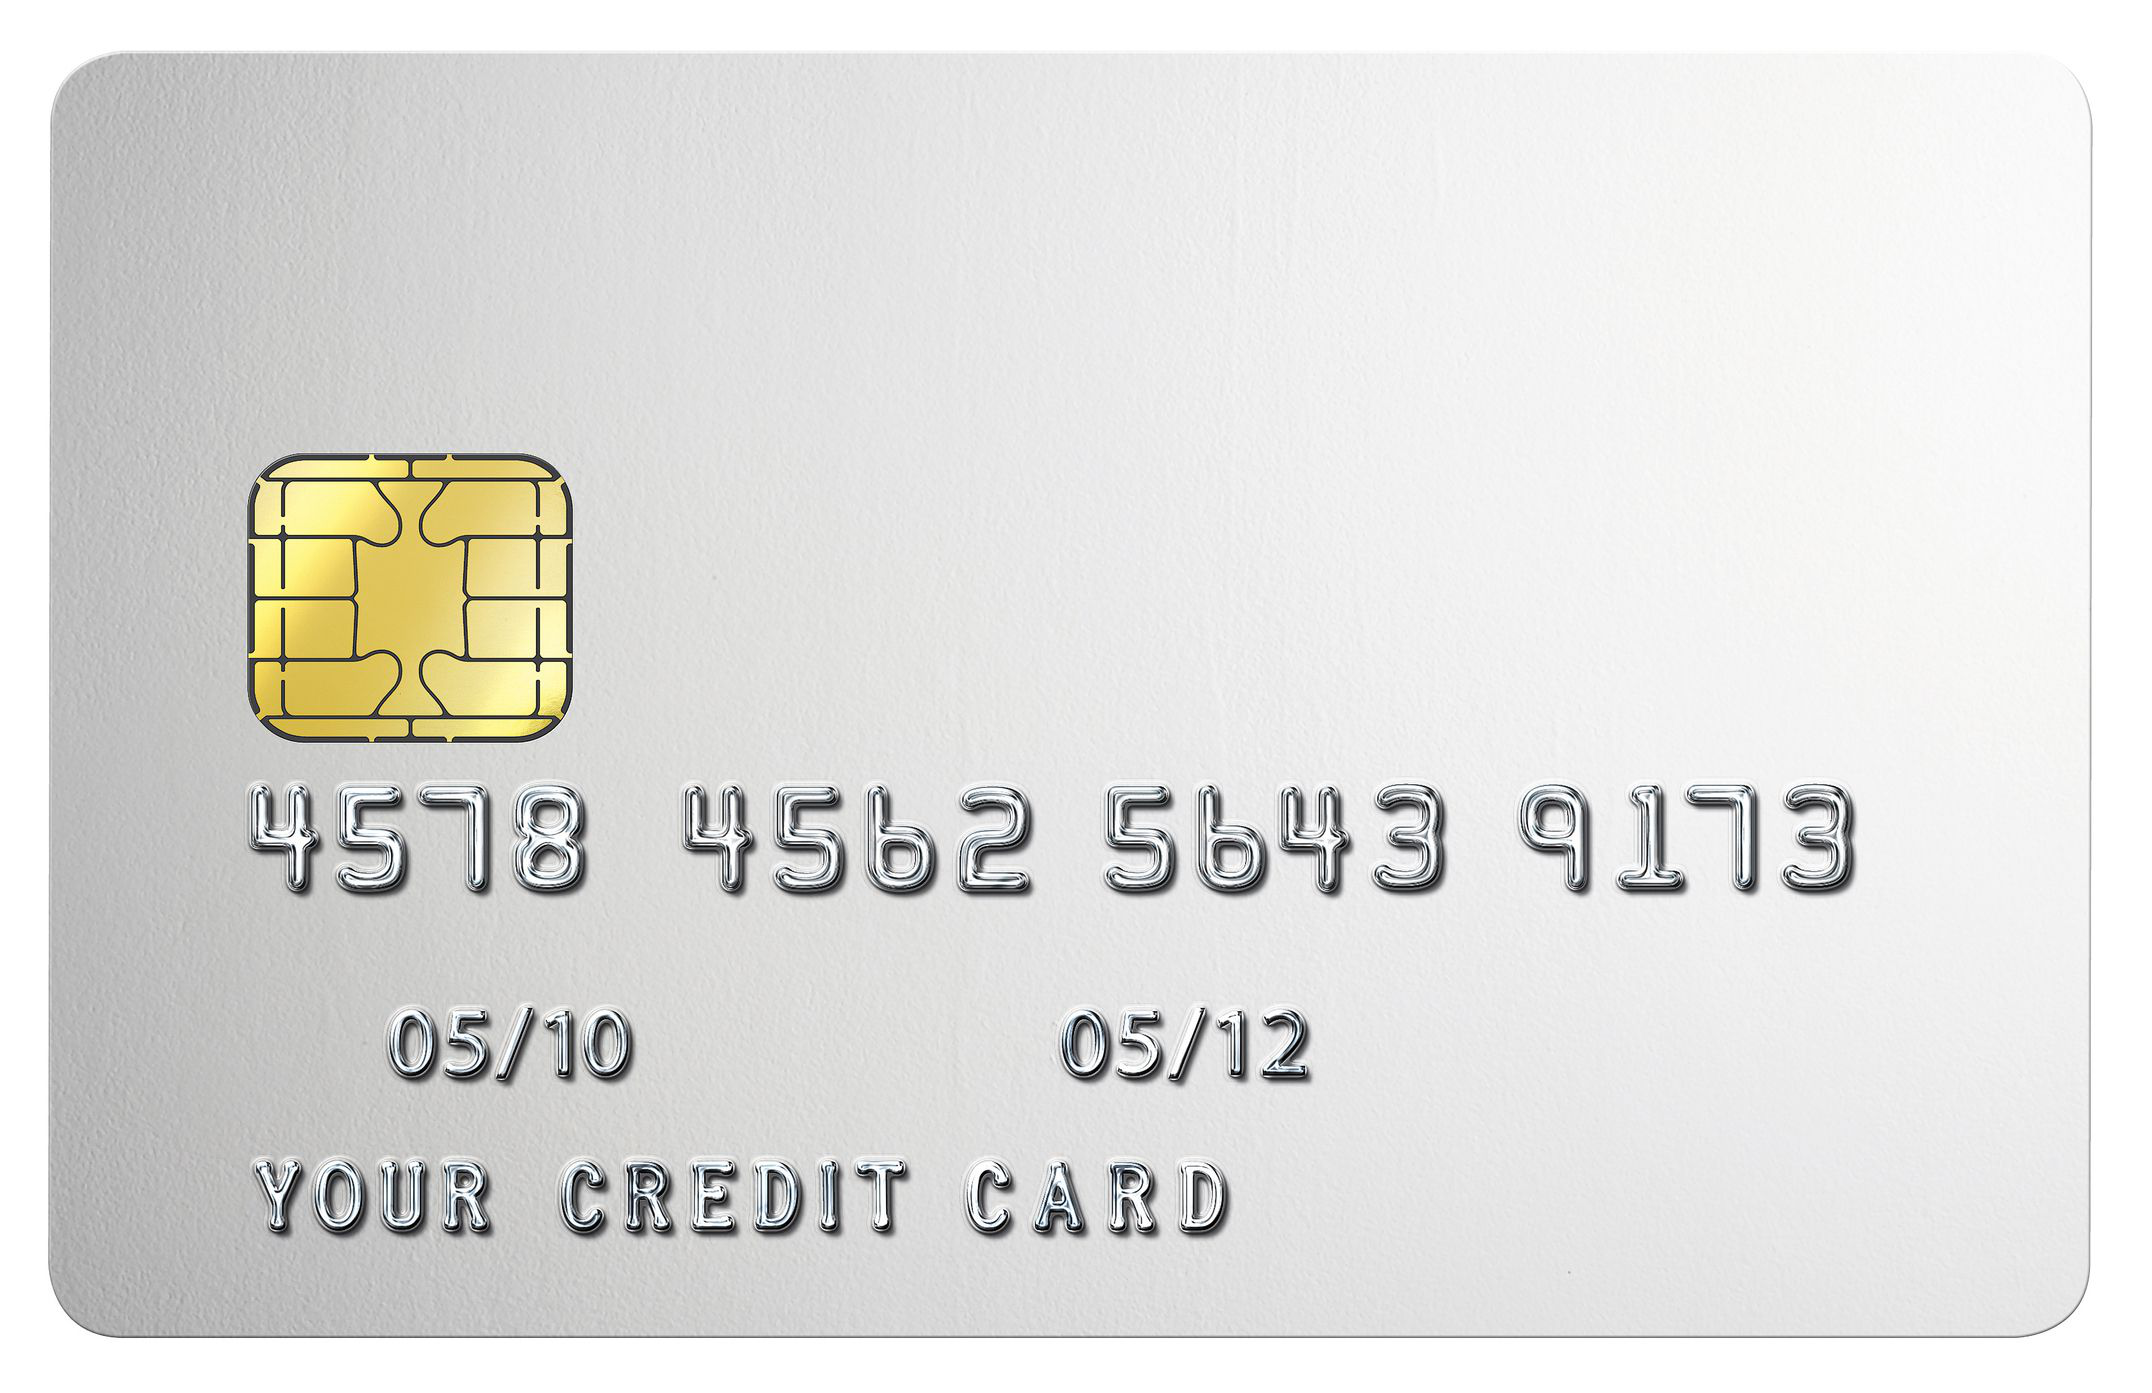

In [31]:
from PIL import Image
from IPython.display import display

path="credit_card.jpg"
display(Image.open(path))

Since the algorithm is even, we start at the first digit, and double every second digit.

We get:

| 4  | 5  | 7  | 8  | 4  | 5  | 6  | 2  | 5  | 6  | 4  | 3  | 9  | 1  | 7  | 3  |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| 8  |   | 14  |   | 8  |   | 12  |   | 10  |   | 8  |   | 18  |   | 14  |   |   |

We sum up the individual digits:

| 4  | 5  | 7  | 8  | 4  | 5  | 6  | 2  | 5  | 6  | 4  | 3  | 9  | 1  | 7  | 3  |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| 8  |   | 1 + 4 = 5 |   | 8  |   | 1 + 2 = 3 |   | 1 + 0 = 1 |   | 8  |   | 1 + 8 = 9 |   | 1 + 4 = 5 |   |   |

We sum it with all other digits (except for the last digit, as it's a check-digit).

| 4  | 5  | 7  | 8  | 4  | 5  | 6  | 2  | 5  | 6  | 4  | 3  | 9  | 1  | 7  | 3  |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| 8  | 5  | 5  | 8  | 8  | 5  | 3  | 2  | 1  | 6  | 8  | 3  | 9  | 1  | 5  | x  |

We get a sum of 77. We then take the modulo 10 of 77 (equivalent to finding the remainder after dividing by 10):

$$77 \% 10 = 7$$

Finally, depending on which version of the algorithm is being used, we can either check if the result from the previous step (7) is equal to the check-digit (3). In this case, we check if the sum of the result from the previous step and the check-digit is divisible by 10:

$$ 3 + 7 = 10 $$

Since 10 is obviously divisible by 10, then the credit card number is valid.

In [22]:
# alg_type is either 0 or 1, indicating how the sum is verified against the check-digit
def luhn(number, alg_type):
    
    num_len = len(number)
    # if number of digits is even
    if (num_len%2 == 0):
        i = 0
    # if number of digits is odd
    else:
        i = 1
    
    s = 0
    # we ignore the last digit, as it's the check-digit
    for index in range(num_len - 1):        
        num = int(number[index])
        
        if (index % 2 != i):
            s += num
        else: 
            num *= 2
            if (num >= 10):
                s += num%10
                s += num//10
            else:
                s += num
    if alg_type:
        if (s%10 == int(number[num_len - 1])):
            return True
        else:
            return False
    else :
        if (s%10 + int(number[num_len - 1]) == 10):
            return True
        else:
            return False        
    
# try with above example
number = "4578456256439173"
print(luhn(number, 0))
print(luhn(number, 1))
# change the check-digit to 7
number = "4578456256439177"
print(luhn(number, 0))
print(luhn(number, 1))

True
False
False
True
